<a href="https://colab.research.google.com/github/fellow-coder/melusi-zwane/blob/main/Stock_prediction_for_Tesla_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Description: Predict the future price of the Tsla

In [17]:
#IMport the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

In [18]:
#load the dataset
from google.colab import  files
files.upload()

Saving TSLA.csv to TSLA (1).csv


{'TSLA.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2021-01-11,849.400024,854.429993,803.619995,811.190002,811.190002,59301600\n2021-01-12,831.000000,868.000000,827.340027,849.440002,849.440002,46270700\n2021-01-13,852.760010,860.469971,832.000000,854.409973,854.409973,33312500\n2021-01-14,843.390015,863.000000,838.750000,845.000000,845.000000,31266300\n2021-01-15,852.000000,859.900024,819.099976,826.159973,826.159973,38777600\n2021-01-19,837.799988,850.000000,833.000000,844.549988,844.549988,25367000\n2021-01-20,858.739990,859.500000,837.280029,850.450012,850.450012,25665900\n2021-01-21,855.000000,855.719971,841.419983,844.989990,844.989990,20521100\n2021-01-22,834.309998,848.000000,828.619995,846.640015,846.640015,20066500\n2021-01-25,855.000000,900.400024,838.820007,880.799988,880.799988,41173400\n2021-01-26,891.380005,895.900024,871.599976,883.090027,883.090027,23131600\n2021-01-27,870.349976,891.500000,858.659973,864.159973,864.159973,27334000\n2021-01-28,820.000000,848.0000

In [19]:
#store the data
df = pd.read_csv('TSLA.csv')
#set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2021-01-11,2021-01-11,849.400024,854.429993,803.619995,811.190002,811.190002,59301600
2021-01-12,2021-01-12,831.000000,868.000000,827.340027,849.440002,849.440002,46270700
2021-01-13,2021-01-13,852.760010,860.469971,832.000000,854.409973,854.409973,33312500
2021-01-14,2021-01-14,843.390015,863.000000,838.750000,845.000000,845.000000,31266300
2021-01-15,2021-01-15,852.000000,859.900024,819.099976,826.159973,826.159973,38777600
...,...,...,...,...,...,...,...
2022-01-05,2022-01-05,1146.650024,1170.339966,1081.010010,1088.119995,1088.119995,26706600
2022-01-06,2022-01-06,1077.000000,1088.000000,1020.500000,1064.699951,1064.699951,30112200
2022-01-07,2022-01-07,1080.369995,1080.930054,1010.000000,1026.959961,1026.959961,27919000
2022-01-10,2022-01-10,1000.000000,1059.099976,980.000000,1058.119995,1058.119995,30346500


In [21]:
#plot the linear regression line and the close price
df3 = df.copy()
#create the nuew column called 'Number' that ranges from 0 to the length of the data set
df3['numbers'] = list(range(0, len(df3)))
#store the numbers column into a variable called "x"as an array
X = np.array(df3[['numbers']])
#store the close price as an array in a variable called " y"
y = df3['Close'].values
#Create and train the model
lin_model = LinearRegression().fit(X,y)
print('Intercept:', lin_model.intercept_)
print('Slope:', lin_model.coef_)

Intercept: 610.5350326553961
Slope: [1.40672034]


Text(0.5, 1.0, 'Close Prices History')

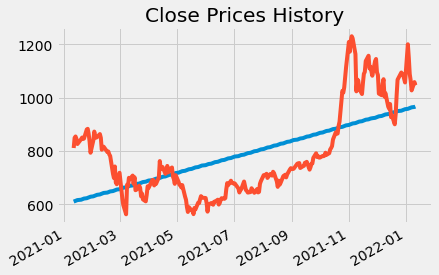

In [24]:
#prepare the data for visualisation 
#get the prediction prices from the model and the store them into a variable called 'y pred'
y_pred= lin_model.coef_* X + lin_model.intercept_ #y =mc + b
#store the predicted values in a new cloumn called 'pred'
df3['pred'] = y_pred
#plot the data
df3['pred'].plot()
df3['Close'].plot()
plt.title('Close Prices History')

In [26]:
#how good is the model?
r2_score(df3['Close'], df3['pred'])

0.37598734934864764

In [27]:
#show the possible price for the next day based on the model
lin_model.coef_*len(df3)+1 + lin_model.intercept_

array([968.84199811])